# Clustering
#### Author: Yilin Yang
#### Date: 11/11/2022

### Introduction

#### Dataset Introduction
##### First Dataset: Advertiments click
Advertisements is one of the important sources for internet influencers to earn benefits and money from social media platforms. In this dataset, we will work on an advertising dataset. There are many features to determine whether internet users will click on advertisements. 


    This datasets contain these columns:


    Daily Time Spent on Site: internet users' time consumptions on site in minutes


    Age: Internet users' ages in years


    Area Income: Internet users' average incomes in geographical area


    Daily Internet Usage: Daily average internet time consumptions of internet users in minutes


    Ad Topic Line: Headline of the advertisement


    City: City of consumer


    Male: Whether or not consumer was male


    Country: Country of consumer


    Timestamp: Time at which consumer clicked on Ad or closed window


    Clicked on Ad: 0 or 1 indicated clicking on Ad


##### Instagram Influencers

Instagram is very popular nowadays among the world. People in different countries like to use this media platform to share their lives, post some exciting moments and connect with their families and friends. There are some instagram influencers can use the platform to gather likes from their fans, use their popularity to promote some advertisements in order to gain benefits from instagram. This dataset talks about how to measure the influence score among influencers. Here are the column introduction for this dataset. 
    
    channel info: Username in instagram

    influence score: It is calculated based on their popularity.

    posts: total posts they have

    followers: total followers they have

    avg_likes: average likes of their total posts

    60_days_eng_rate: 60 days of engagement rate

    new_post_avg_like: a calculation of the average likes they gained from new posts. 

    total_likes: total likes of their posts in instagram.

    country: users' origin. What countries they from?

#### introduction to clustering
Clustering is an unsupervised learning method. We will use clustering to find the find useful features, explanatory underlying processes, significent structures, and set groups for them. Clustering will assign datapoints to certain groups since they are similar to each other and each group are totally distinct with other groups. We can find the representatives of homogeneous groups and the differences between different groups. More than this, we can also determine the unextraodinary outliers and analyze them. 
    
Clustering is really important for first dataset because it can determine the instrinct relationships between unlabelled datasets. The internet influencers can make a decision to determine they can greatly suitable for which types of users in order to achieve the biggest benefits. 

In the second dataset, clustering can help salers to cluster homogeneous factors together in order to get more persuasive and accurate result to determine which kind of internet influencer is most suitable for their products. 

In these datasets, we will use three kinds of methods of clustering and compare their accuracy and feasibility to determine which method is the most suitable to do clustering and reach conclusions. 

The three methods of clustering: 

K means

DBSAN

Hierarchical clustering

### Theory

#### K means
K means Clustering in Machine Learning is one of the simplest methods among all clustering methods for unsupervised learning. 

Firstly, the K mean will randomly selected centroids by using starting points of every cluster, and then repeat and repeat again to make an optimization of the cetroids' location. 

How K means clustering implemented in this project?
    
    Step1: We'll use Scikit-learn library to import K-mean clustering method

    Step2: Do feature selections and EDA to firstly plot the datasets and know datasets better

    Step3: Hyperparameter tunning to find the optimal cluster size

    Step4: Make a visualization plot for final results and evaluate the model
#### DBSAN
Density-based sptial clustering of Application with Noise is a density-based clustering. It is a great method for large datasets with noisy data points and outliers. The difference between DBSAN and K mean is that when the datasets are not organized enough, K-mean clustering has difficulty to process the datasets, but DBSAN can handle clusters of different sizes and datasets with noisy datas and outliers.

How DBSAN clustering implemented in this project?

    STEP1&2 are similar as K-mean

    STEP3: Hyperparameter tunning to find the optimal eps and min_sample size

    STEP4: Make a visualization plot for final results of DBSAN after the hyperparameter tunning and evaluate the method.

#### Hierarchical Clustering(Agglomerative Clustering)
Agglomerative Clustering is one of the Hierarchical Clustering algorithm. It is also used for unsupervised machine learning. The hierarchical clustering is worked as how its name shows, it seeks to build hierarchical clusters to find the homogeneous points with similar clusters. The interesting thing is that Agglomerative clustering works through bottom to up, each data point is considered as individual objects, when two points are similar, they will get clustered into bigger groups. 

How Agglomerative Clustering implemented in this project?

    STEP1&2 are similar as K-mean

    STEP3: Make a visualization plot of Dendrogram

    STEP3: Use Dendrogram to do hyperparameter tunning to find the optimal numbers of clusters

    STEP4: Make a visualization plot for final results of Aggolomerative Clustering after the hyperparameter tunning and evaluate the method.
    

First, Load the required package for futhuer exploration

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

### Methods (for advertisement dataset)

#### Preprocess the dataset and EDA

Input the advertising dataset and drop the nonnumeric column. 

As we can see, 'clicked on Ad' column is a labeled column, we cannot store it as X for the future clustering

In [6]:
adv = pd.read_csv("../data/00-raw-data/advertising.csv")
adv = adv.select_dtypes(['number'])
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


Firstly explore datasets, find whether there are some NA values in the datasets, if yes, drop the NA values. 

Then do EDA with datasets, make some visualization plots and first analyze the datasets.

In [7]:
adv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [8]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [9]:
adv.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64

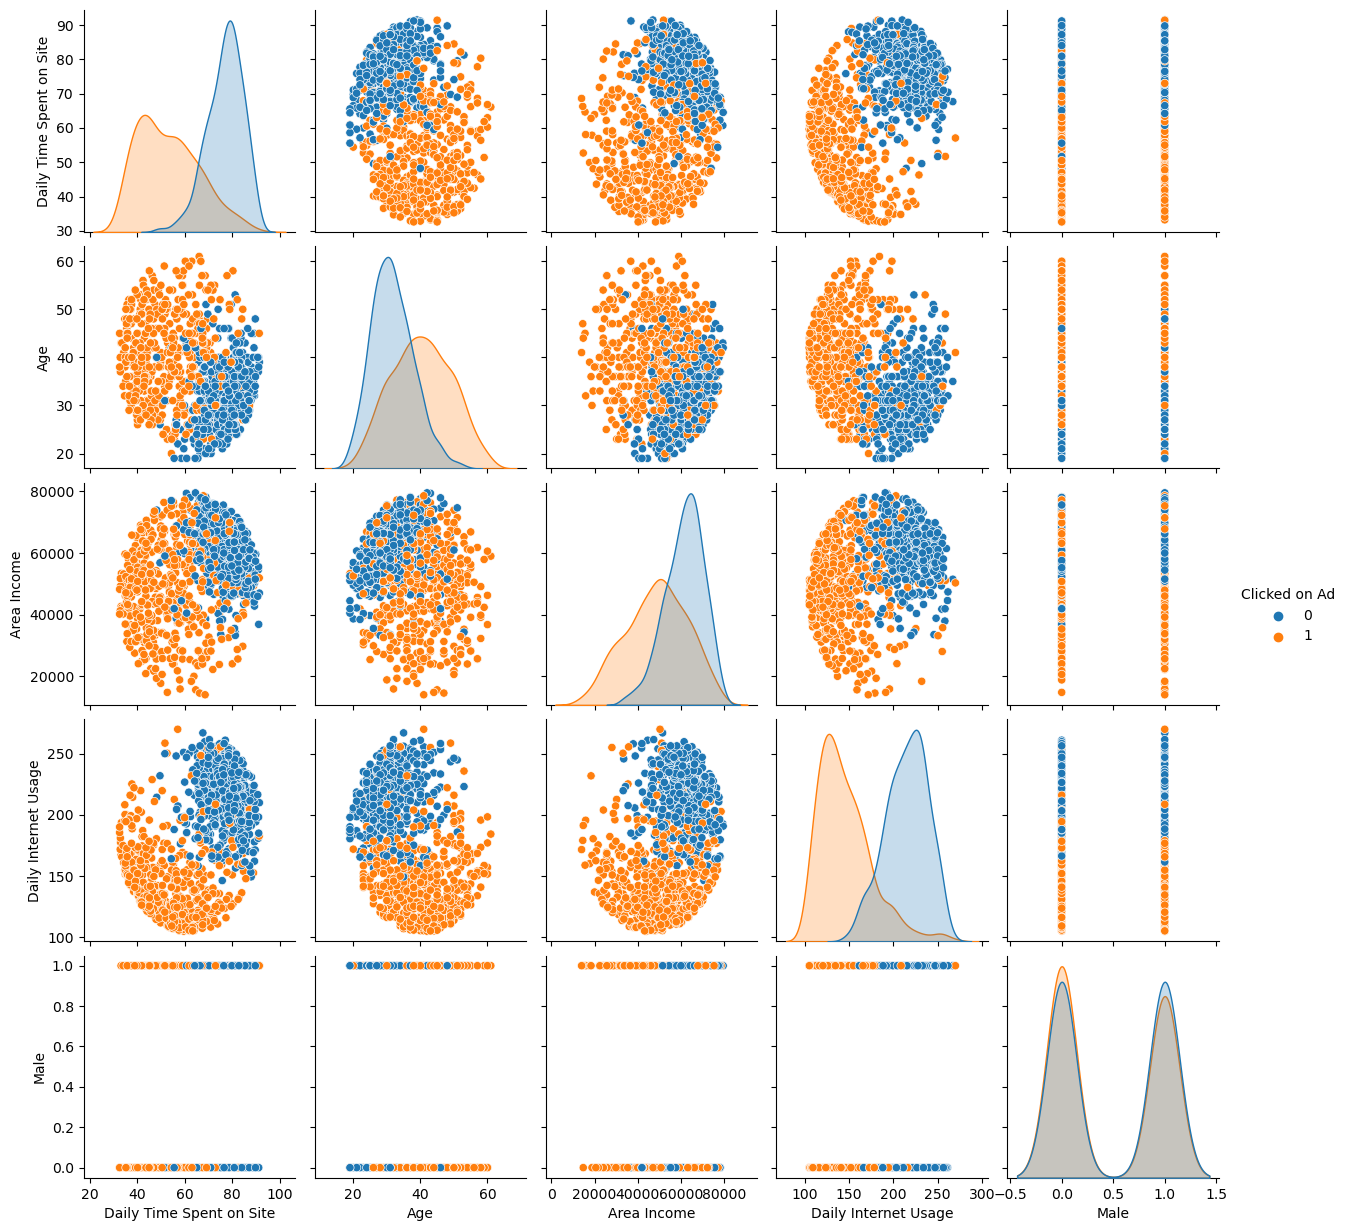

In [10]:
sns.pairplot(data=adv,hue='Clicked on Ad')

Here is the pairplot shows the relationship between each columns, and the clustering of whether internet users clicked on advertisements. We can take a instinct insight of datasets.

##### Seperate the dataset into features

In [11]:
X = adv[['Daily Time Spent on Site','Daily Internet Usage']]#Choose two features for the further clustering
scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)

#### Use K-mean Clustering to process the datasets and predict the model

##### Hyperparameter tunning

In [12]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. make sure to save it in a dataframe and plot it using matplotlib.
distortions = []
inertias = []
k = 11

for k in range(1,k):
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1))/X.shape[0])
    inertias.append(kmeanModel.inertia_)
    evaluation = pd.DataFrame.from_records({'Cluster':np.arange(1,k+1), 'Distortion':distortions, "Inertia":inertias})

evaluation

,Cluster,Distortion,Inertia
0,1,1.354428,2000.000000
1,2,0.742440,692.500182
2,3,0.615420,476.346131
3,4,0.529527,351.434006
4,5,0.483688,293.790219
5,6,0.442116,243.475153
6,7,0.412500,209.567018
7,8,0.386317,181.678764
8,9,0.360663,161.099235
9,10,0.342820,143.415939


In [13]:
# plot distortion and inertia for kmeans, you can either plot them seperately or use fig, ax = plt.subplots(1, 2) to plot them in the same figure. Suggest the optimal number of clusters based on the plot.
evaluation.plot.line(x = 'Cluster', subplots=True)

array([<AxesSubplot:xlabel='Cluster'>, <AxesSubplot:xlabel='Cluster'>],
      dtype=object)

Elbow Method to determine the number of clusters to be formed:


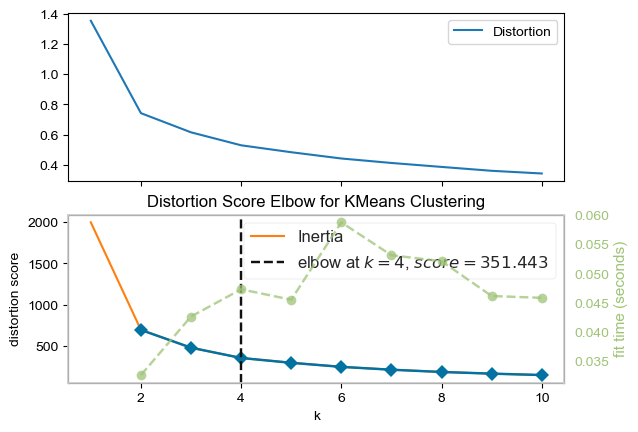

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

From the Elbow method, we can find the optimal numbers of clustering is 4, and we will use n_clusters=4 for further k-mean clustering. 

##### Final Results

In [15]:
bestK = KMeans(n_clusters=4, init='k-means++',random_state=42)
labels4 = bestK.fit_predict(X)
adv['nlabels'] = labels4
sns.scatterplot(x='Daily Time Spent on Site', y="Daily Internet Usage",hue='nlabels',data=adv)

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

#### Perform DBSCAN and predict the labels

##### Hyperparameter tunning(silhouette_score)

In [16]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.
eps_range = np.arange(0.1,2.1,0.1)
for i in eps_range:
    db = DBSCAN(eps=i, min_samples=5).fit(X)
    labels = db.labels_
    if len(np.unique(labels)) == 1:
        continue
    silhouette_avg = silhouette_score(X, labels)
    print(
        "For eps = {:0.2f}".format(i),
        "The average silhouette_score is {:0.4f}.".format(silhouette_avg)
    )


For eps = 0.10 The average silhouette_score is -0.2353.
For eps = 0.20 The average silhouette_score is 0.2678.
For eps = 0.30 The average silhouette_score is 0.1170.
For eps = 0.40 The average silhouette_score is 0.2047.


In [17]:
S = np.arange(1,11)
for s in S:
    db = DBSCAN(eps=0.2, min_samples=s).fit(X)
    labels = db.labels_
    if len(np.unique(labels)) == 1:
        continue
    silhouette_avg = silhouette_score(X, labels)
    print(
        "For min_samples = {:0.2f}".format(s),
        "The average silhouette_score is {:0.4f}.".format(silhouette_avg)
    )

For min_samples = 1.00 The average silhouette_score is -0.2542.
For min_samples = 2.00 The average silhouette_score is -0.1322.
For min_samples = 3.00 The average silhouette_score is -0.1322.
For min_samples = 4.00 The average silhouette_score is -0.2648.
For min_samples = 5.00 The average silhouette_score is 0.2678.
For min_samples = 6.00 The average silhouette_score is 0.2578.
For min_samples = 7.00 The average silhouette_score is 0.2543.
For min_samples = 8.00 The average silhouette_score is 0.2437.
For min_samples = 9.00 The average silhouette_score is 0.1131.
For min_samples = 10.00 The average silhouette_score is 0.2179.


From the silhouette_score, we can get the most suitable eps=0.2, min_samples = 5, I will use thes scores for the final modeling

##### Final results

/Users/yangyilin/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


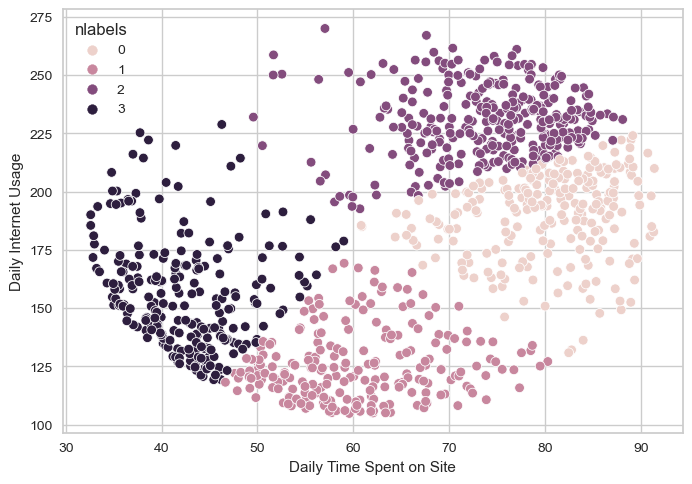

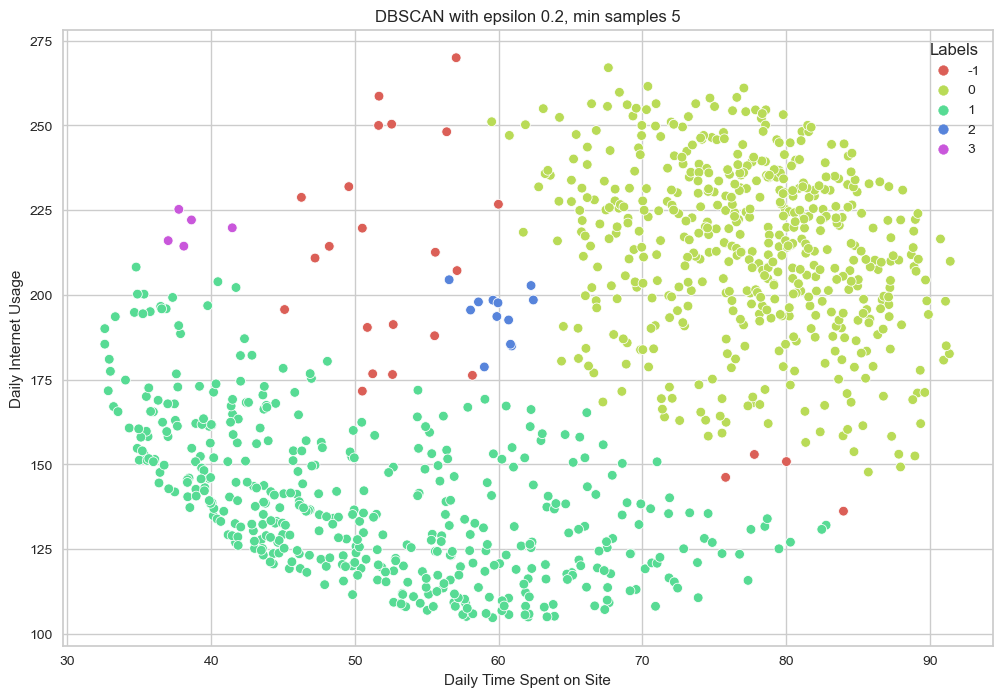

In [18]:
db = DBSCAN(eps=0.2, min_samples=5).fit(X)

adv['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(adv['Daily Time Spent on Site'], adv['Daily Internet Usage'], hue=adv['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 0.2, min samples 5')
plt.show()

#### Agglomerative Clustering

In [19]:
# Perform Agglomerative Clustering
model = AgglomerativeClustering().fit(X)
labels = model.labels_

In [20]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
Z = linkage(X, method='ward')
dend = dendrogram(Z)
plt.axhline(y=12,color='r',linestyle='--',label=21)

From the dendrogram, I will choose the number of clusters as 3 for the the final modeling. As the line shows in the plot, we can see the four clusters are very suitable for clustering.

#### Final results

In [21]:
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(X)
#Adding the Clusters feature to the orignal dataframe.
adv["Clusters"]= yhat_AC

/Users/yangyilin/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


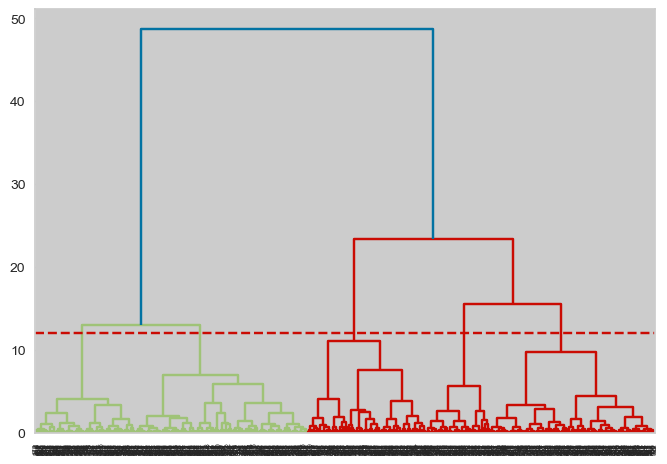

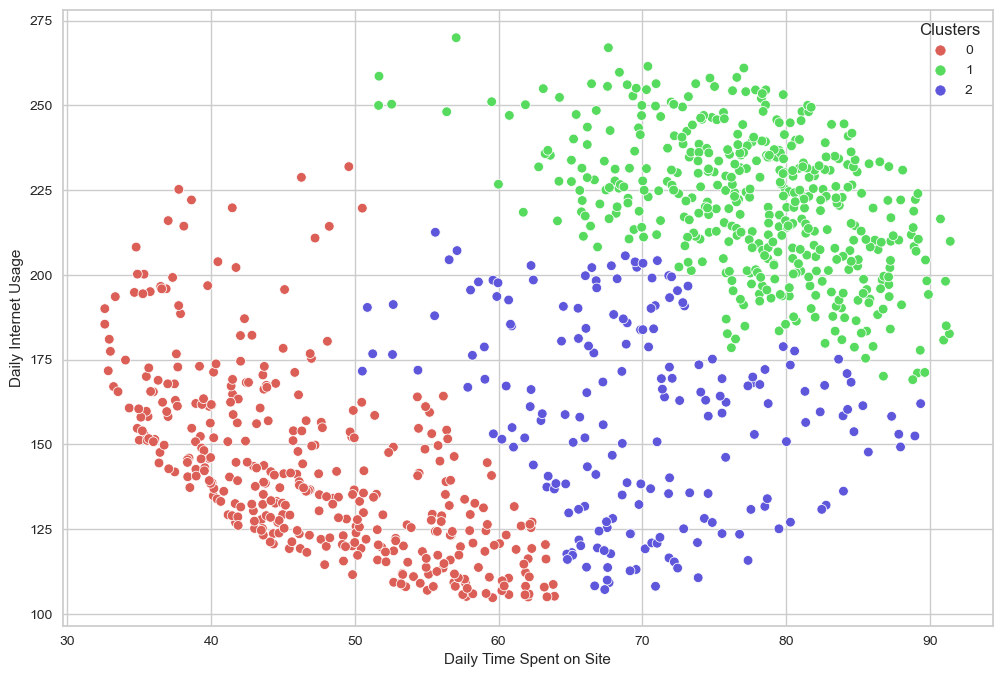

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(adv['Daily Time Spent on Site'], adv['Daily Internet Usage'], hue=adv['Clusters'], 
                palette=sns.color_palette('hls', np.unique(yhat_AC).shape[0]))
plt.show()

### Methods (for instagram influencer dataset)

#### Preprocess the dataset

Input the instagram influencer dataset and drop the nonnumeric column. 

More than this, rank, unnamed: 0, influence_score are either labeled columns or unnecessary columns, I dropped these columns as well

In [23]:
df = pd.read_csv("../data/00-raw-data/instagram_infl.csv")
df = df.select_dtypes(['number'])
df = df.drop(['rank','Unnamed: 0','influence_score'],axis=1)
df.head()

,posts(k),followers(m),X60_day_eng_rate(%),new_post_avg_like(m),total_likes(b),avg_likes
0,3.30,475.8,1.39,6.5,29.0,8700000.0
1,6.90,366.2,1.62,5.9,57.4,8300000.0
2,0.89,357.3,1.24,4.4,6.0,6800000.0
3,1.80,342.7,0.97,3.3,11.5,6200000.0
4,6.80,334.1,0.20,665.3,12.5,1900000.0


Firstly explore datasets, find whether there are some NA values in the datasets, if yes, drop the NA values. 

Then do EDA with datasets, make some visualization plots and first analyze the datasets.

In [24]:
df.isna().sum()

posts(k)                0
followers(m)            0
X60_day_eng_rate(%)     1
new_post_avg_like(m)    8
total_likes(b)          0
avg_likes               0
dtype: int64

In [25]:
df = df.dropna()

In [26]:
sns.pairplot(data=df)

##### Seperate the dataset into features

In [27]:
X = df[['followers(m)','posts(k)']]#Choose two features for the further clustering
scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)

#### Use K-mean Clustering to process the datasets and predict the model

##### Hyperparameter tunning

In [28]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. make sure to save it in a dataframe and plot it using matplotlib.
distortions = []
inertias = []
k = 11

for k in range(1,k):
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1))/X.shape[0])
    inertias.append(kmeanModel.inertia_)
    evaluation = pd.DataFrame.from_records({'Cluster':np.arange(1,k+1), 'Distortion':distortions, "Inertia":inertias})

evaluation

,Cluster,Distortion,Inertia
0,1,1.138777,384.000000
1,2,0.792269,229.247154
2,3,0.549924,92.641484
3,4,0.466145,73.139519
4,5,0.416009,54.899075
5,6,0.388874,45.679880
6,7,0.365474,37.442178
7,8,0.325303,32.492434
8,9,0.306539,28.839487
9,10,0.289259,24.084946


Elbow Method to determine the number of clusters to be formed:


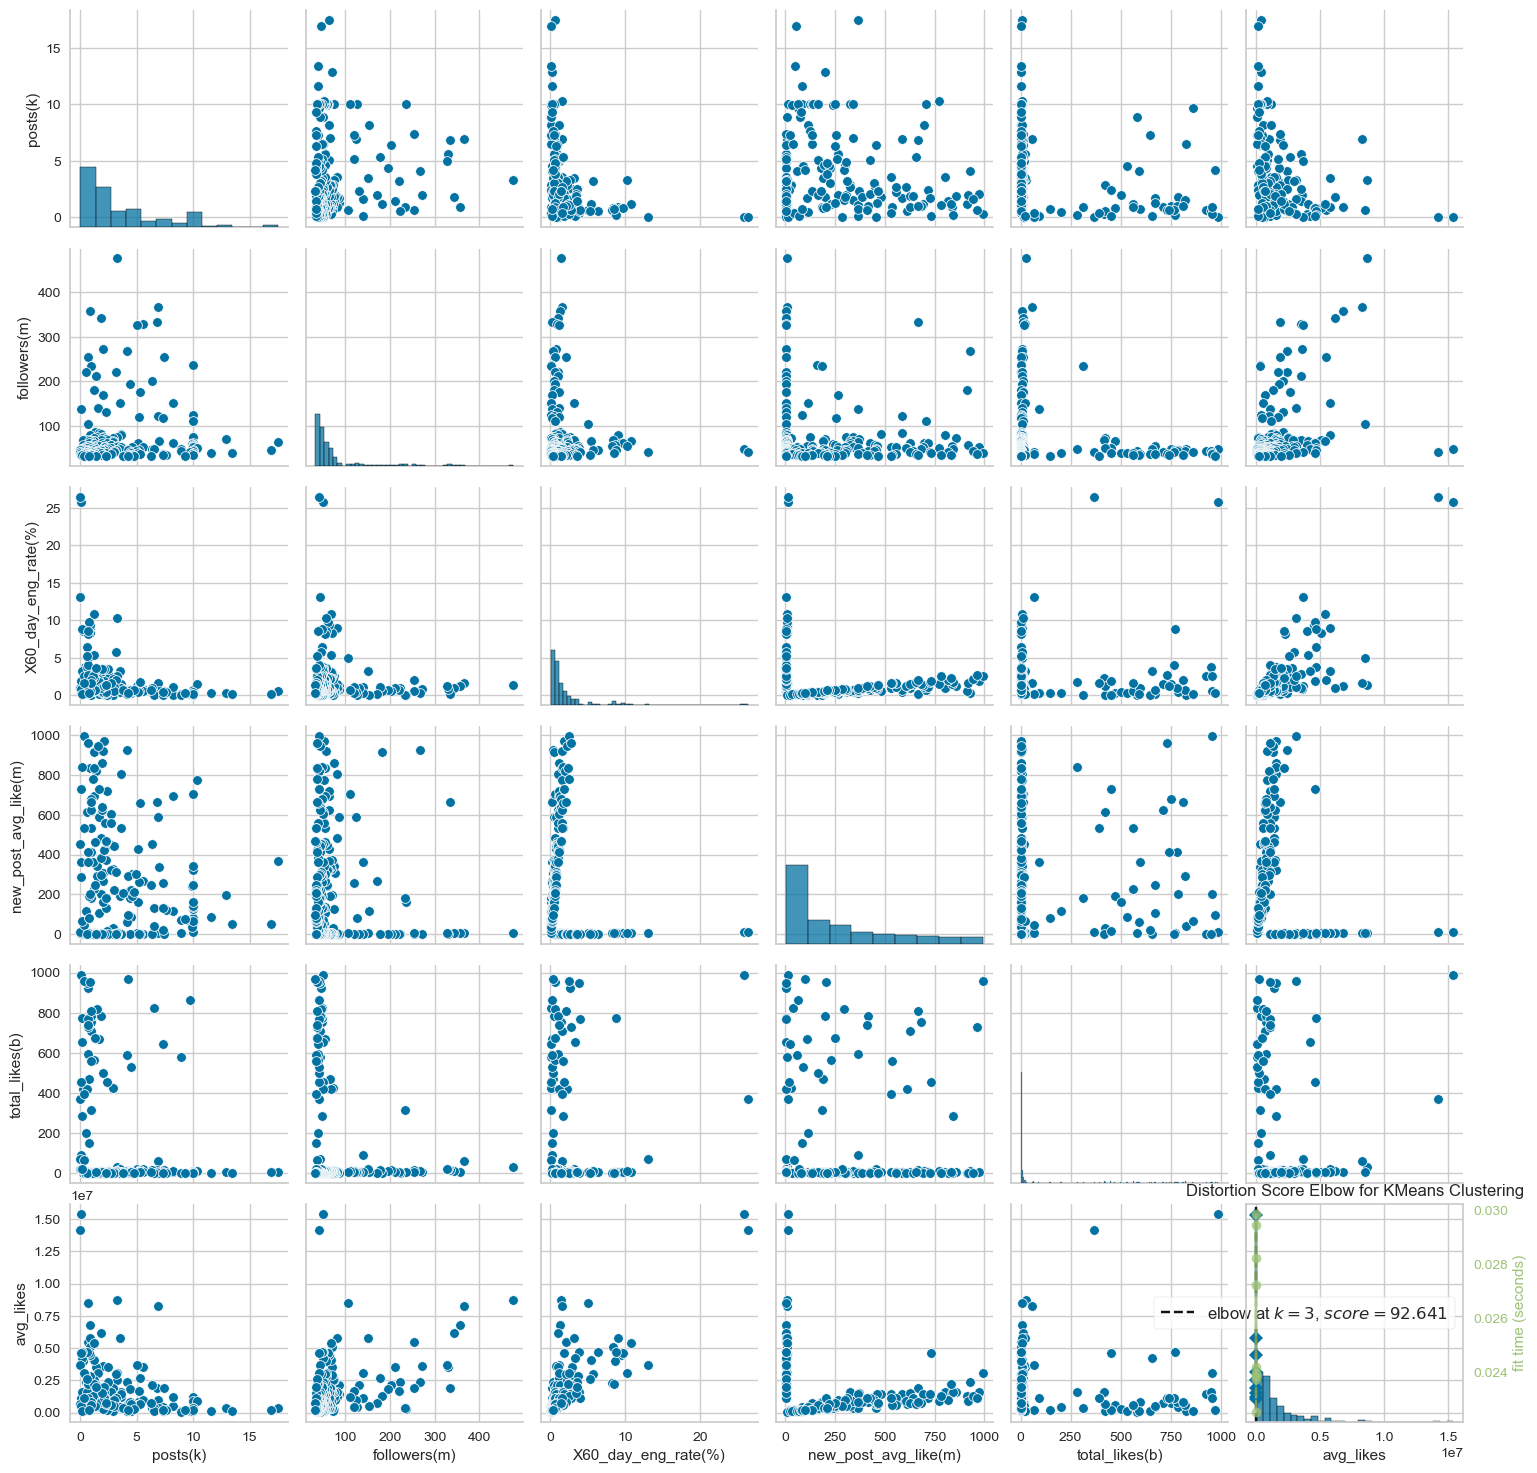

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

From the Elbow method, we can find the optimal numbers of clustering is 4, and we will use n_clusters=4 for further k-mean clustering. 

##### Final Results

In [30]:
bestK = KMeans(n_clusters=3, init='k-means++',random_state=42)
labels4 = bestK.fit_predict(X)
df['nlabels'] = labels4
sns.scatterplot(x='followers(m)', y="posts(k)",hue='nlabels',data=df)

<AxesSubplot:xlabel='followers(m)', ylabel='posts(k)'>

#### Perform DBSCAN and predict the labels

##### Hyperparameter tunning(silhouette_score)

In [31]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.
eps_range = np.arange(0.1,2.1,0.1)
for i in eps_range:
    db = DBSCAN(eps=i, min_samples=5).fit(X)
    labels = db.labels_
    if len(np.unique(labels)) == 1:
        continue
    silhouette_avg = silhouette_score(X, labels)
    print(
        "For eps = {:0.2f}".format(i),
        "The average silhouette_score is {:0.4f}.".format(silhouette_avg)
    )

For eps = 0.10 The average silhouette_score is 0.0935.
For eps = 0.20 The average silhouette_score is 0.5144.
For eps = 0.30 The average silhouette_score is 0.5344.
For eps = 0.40 The average silhouette_score is 0.5487.
For eps = 0.50 The average silhouette_score is 0.5568.
For eps = 0.60 The average silhouette_score is 0.5653.
For eps = 0.70 The average silhouette_score is 0.6206.
For eps = 0.80 The average silhouette_score is 0.6351.
For eps = 0.90 The average silhouette_score is 0.5903.
For eps = 1.00 The average silhouette_score is 0.6169.
For eps = 1.10 The average silhouette_score is 0.6431.
For eps = 1.20 The average silhouette_score is 0.6576.
For eps = 1.30 The average silhouette_score is 0.6838.
For eps = 1.40 The average silhouette_score is 0.6838.
For eps = 1.50 The average silhouette_score is 0.6838.
For eps = 1.60 The average silhouette_score is 0.6838.
For eps = 1.70 The average silhouette_score is 0.6838.


In [32]:
S = np.arange(1,11)
for s in S:
    db = DBSCAN(eps=1.4, min_samples=s).fit(X)
    labels = db.labels_
    if len(np.unique(labels)) == 1:
        continue
    silhouette_avg = silhouette_score(X, labels)
    print(
        "For min_samples = {:0.2f}".format(s),
        "The average silhouette_score is {:0.4f}.".format(silhouette_avg)
    )

For min_samples = 1.00 The average silhouette_score is 0.6838.
For min_samples = 2.00 The average silhouette_score is 0.6838.
For min_samples = 3.00 The average silhouette_score is 0.6838.
For min_samples = 4.00 The average silhouette_score is 0.6838.
For min_samples = 5.00 The average silhouette_score is 0.6838.
For min_samples = 6.00 The average silhouette_score is 0.6838.
For min_samples = 7.00 The average silhouette_score is 0.6838.
For min_samples = 8.00 The average silhouette_score is 0.6838.
For min_samples = 9.00 The average silhouette_score is 0.6838.
For min_samples = 10.00 The average silhouette_score is 0.6530.


From the silhouette_score, we can get the most suitable eps=0.7, min_samples = 3, I will use thes scores for the final modeling

##### Final Results

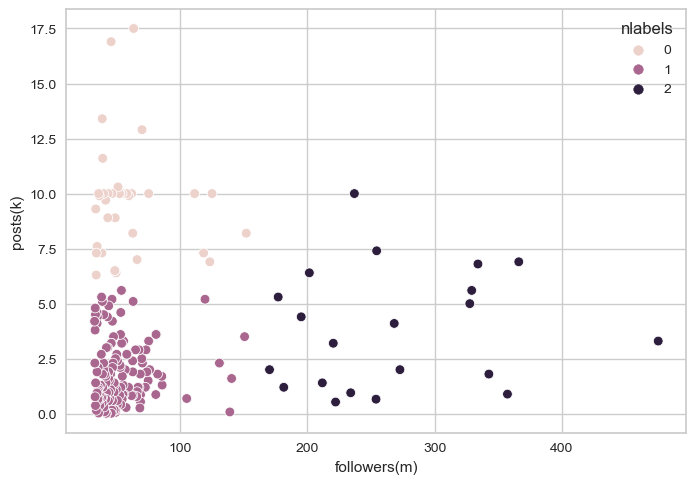

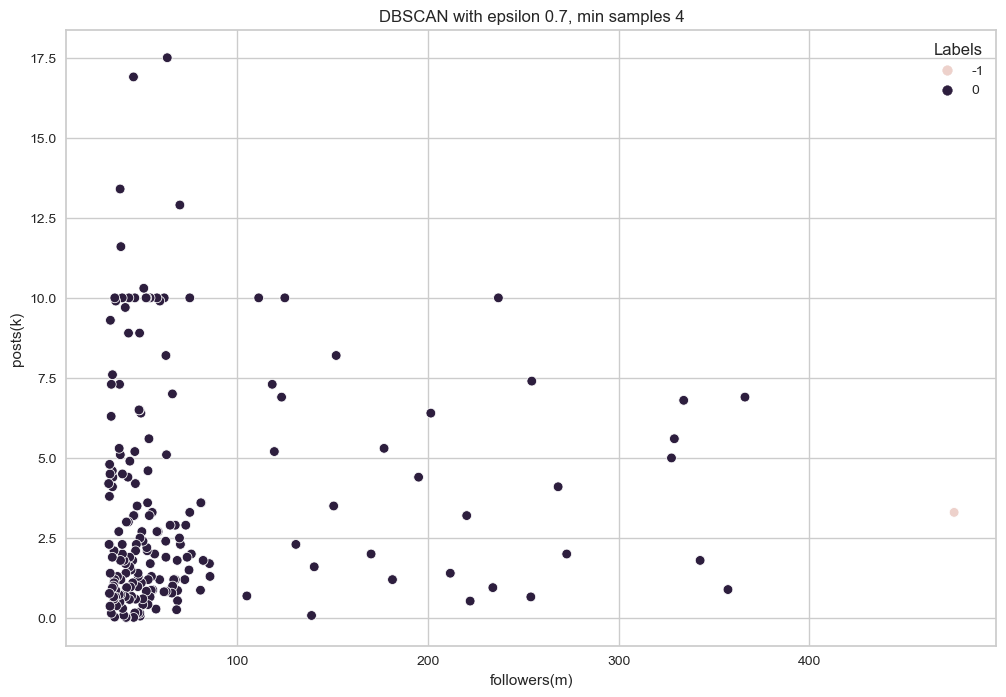

In [33]:
db = DBSCAN(eps=1.4, min_samples=5).fit(X)

df['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['followers(m)'], y=df["posts(k)"], hue=df['Labels'])
plt.title('DBSCAN with epsilon 0.7, min samples 4')
plt.show()

#### Perform Agglomerative Clustering

In [34]:
# Perform Agglomerative Clustering

model = AgglomerativeClustering().fit(X)
labels = model.labels_

In [35]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
Z = linkage(X, method='ward')
dend = dendrogram(Z)
plt.axhline(y=8,color='r',linestyle='--',label=21)

From the dendrogram, I will choose the number of clusters as 3 for the the final modeling. As the line shows in the plot, we can see the four clusters are very suitable for clustering.

#### Final Results

In [36]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(X)
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

In [37]:
sns.scatterplot(x=df['followers(m)'], y=df["posts(k)"], hue=df['Clusters'])

<AxesSubplot:xlabel='followers(m)', ylabel='posts(k)'>

### Results

#### Final results for advertisment datasets

For this section, I will use EDA to take a close glimpse about different methods used in datasets and get the results. 

##### K-means


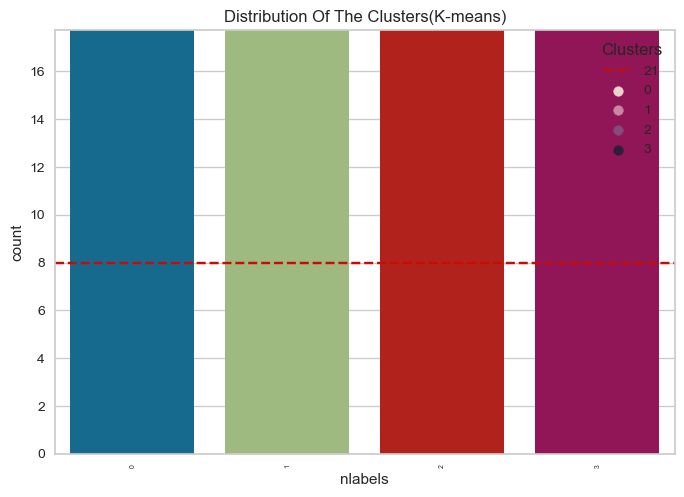

In [38]:
pl = sns.countplot(x=adv["nlabels"])
pl.set_title("Distribution Of The Clusters(K-means)")
plt.show()

The clusters are seemed to be fairly distributed.

In [39]:
sns.scatterplot(x='Daily Time Spent on Site', y="Daily Internet Usage",hue='nlabels',data=adv)

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

In the plot, we can divide the clustering into four groups:

group0: High Daily Spent on Site & Average Daily Internet Usage

group1: Average Daily Spent on Site & Low Daily Internet Usage

group2: High Daily Spent on Site & High Daily Internet Usage

group3: Low Daily Spent on Site & Average Daily Internet Usage

Then I will train these four groups on the columns clicked on ad in order to determine what kind of group is most likely to click on advertisements.

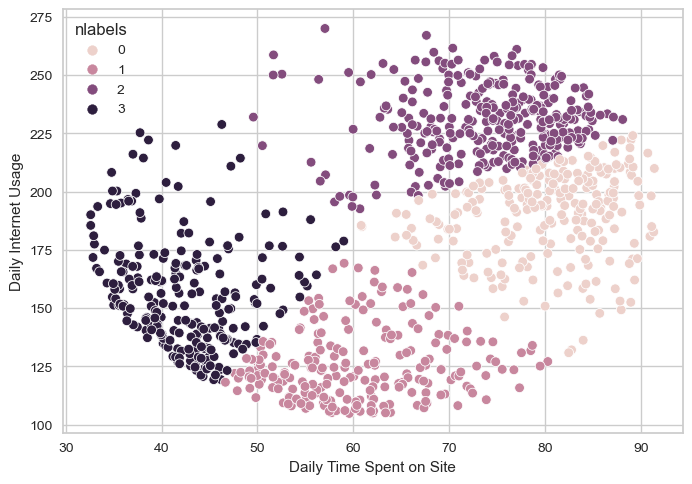

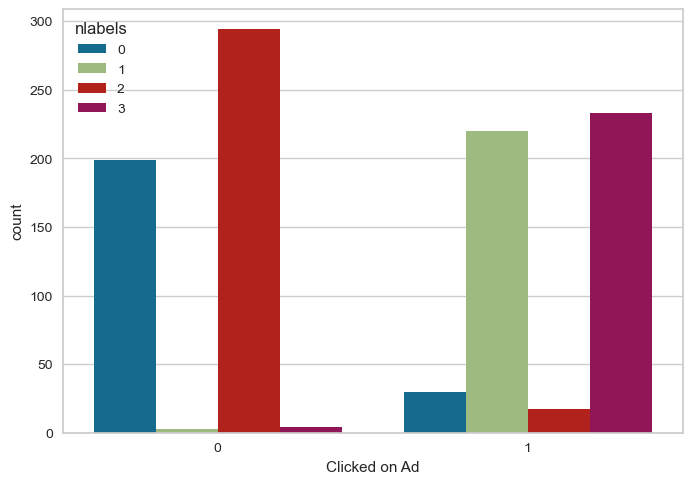

In [40]:
plt.figure()
pl=sns.countplot(hue=adv["nlabels"], x=adv["Clicked on Ad"])
plt.show()

As we can see in the plot, the internet users who in group two(High Daily Spent on Site & High Daily Internet Usage) are more likely to decide not to click on the advertisements. On the contrary, the internet users who in group three(Low Daily Spent on Site & Average Daily Internet Usage) are more likely to decide to click on the advertisements.

In this dataset, K-mean show great performances for clustering, the users can also change the feature columns in order to cluster different kinds of groups in order to gather different results. 

#### DBSCAN

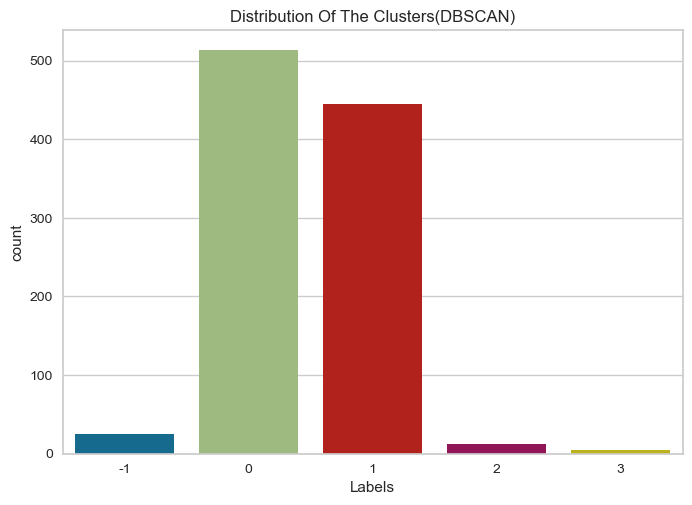

In [41]:
DS = sns.countplot(x=adv["Labels"])
DS.set_title("Distribution Of The Clusters(DBSCAN)")
plt.show()

In [42]:
sns.scatterplot(adv['Daily Time Spent on Site'], adv['Daily Internet Usage'], hue=adv['Labels'], 
                palette=sns.color_palette('hls', np.unique(adv['Labels']).shape[0]))

/Users/yangyilin/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

From DBSCAN clustering, we can clearly see that the different groups of clustering are not fairly distributed. We can conclude that DBSCAN is not a good method for evaluating the advertiment dataset. Because DBSCAN cannot easily handle data points with similar density. We can see there are a lot of outliers in the plots and cannot beeasily separated together. 

#### Agglomerative Clustering

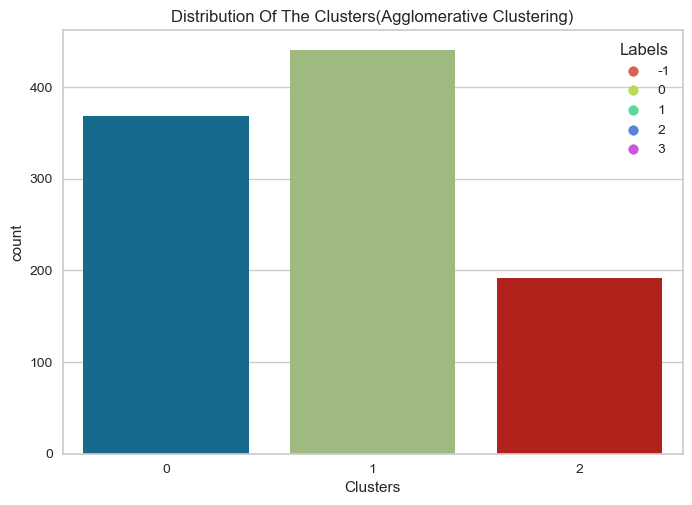

In [43]:
agg = sns.countplot(x=adv["Clusters"])
agg.set_title("Distribution Of The Clusters(Agglomerative Clustering)")
plt.show()

The Group 2 are obviously less than other two groups. 

In [44]:
sns.scatterplot(adv['Daily Time Spent on Site'], adv['Daily Internet Usage'], hue=adv['Clusters'], 
                palette=sns.color_palette('hls', np.unique(adv['Clusters']).shape[0]))

/Users/yangyilin/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

In the plot, we can divide the clustering into three groups:

group0: Low Daily Spent on Site & Low Daily Internet Usage

group1: High Daily Spent on Site & Low Daily Internet Usage

group2: High Daily Spent on Site & High Daily Internet Usage

Then I will train these three groups on the columns clicked on ad in order to determine what kind of group is most likely to click on advertisements.

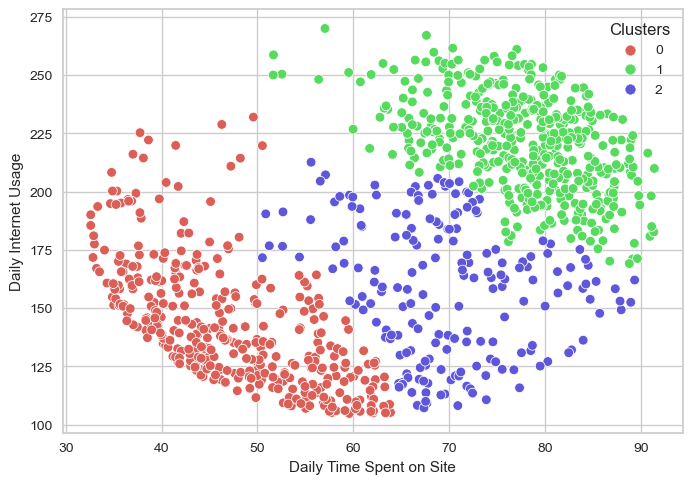

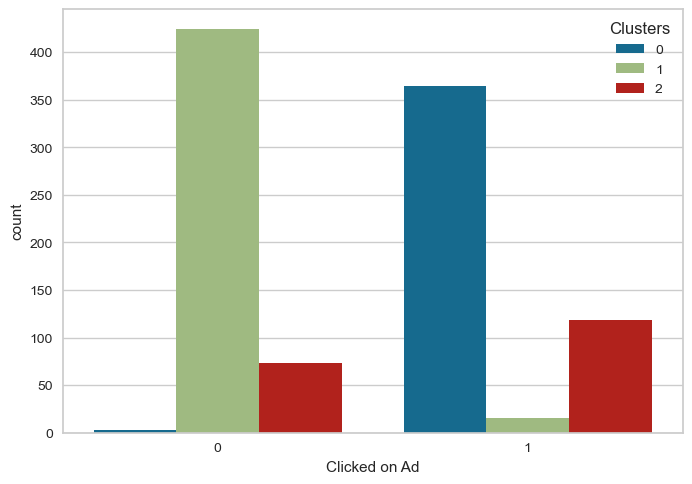

In [45]:
plt.figure()
pl=sns.countplot(hue=adv["Clusters"], x=adv["Clicked on Ad"])
plt.show()

As we can see in the plot, the internet users who in group one(High Daily Spent on Site & Low Daily Internet Usage) are more likely to decide not to click on the advertisements. On the contrary, the internet users who in group zero(Low Daily Spent on Site & Low Daily Internet Usage) are more likely to decide to click on the advertisements. The agglomerative clustering indicates similar conclusions as K-mean clustering. We can combine these two kinds of results together to gather the final conclusion. 

In this dataset,  agglomerative clustering show good performances for clustering, but because the group is not fairly distributed, the result need to be further evaluated by other methods. The users can also change the feature columns in order to cluster different kinds of groups in order to gather different results. 

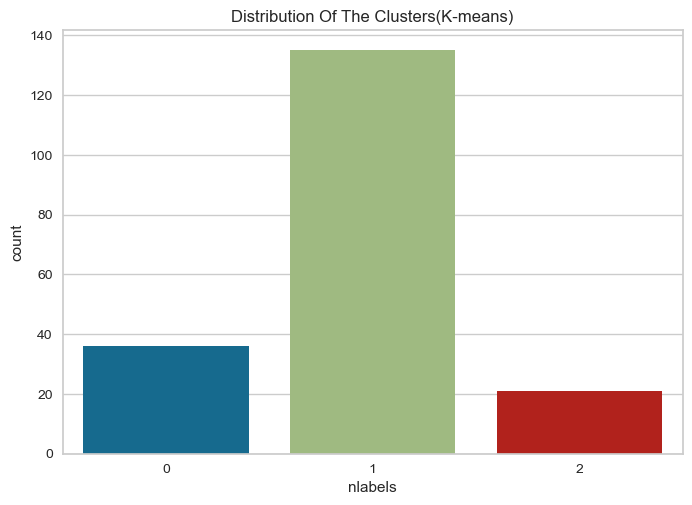

In [46]:
pl = sns.countplot(x=df["nlabels"])
pl.set_title("Distribution Of The Clusters(K-means)")
plt.show()

As we can see, the distribution of K-means clustering are not fairly distributed. The group one is highly larger than other groups. 

In [47]:
sns.scatterplot(x='followers(m)', y="posts(k)",hue='nlabels',data=df)

<AxesSubplot:xlabel='followers(m)', ylabel='posts(k)'>

In the plot, we can divide the clustering into three groups:

group0: Low followers & High number of posts

group1:  Low followers & Low number of posts

group2:  High followers & Low number of posts

##### DBSCAN

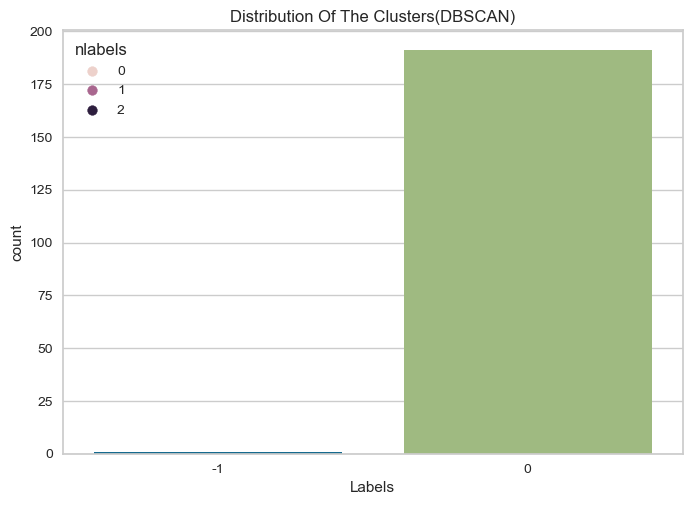

In [48]:
DS = sns.countplot(x=df["Labels"])
DS.set_title("Distribution Of The Clusters(DBSCAN)")
plt.show()

The DBSCAN cannot be used in these plots, because the data points in this dataset is extremely similar with each other, it is hard for DBSCAN to cluster data points. 

##### Agglomerative Clustering

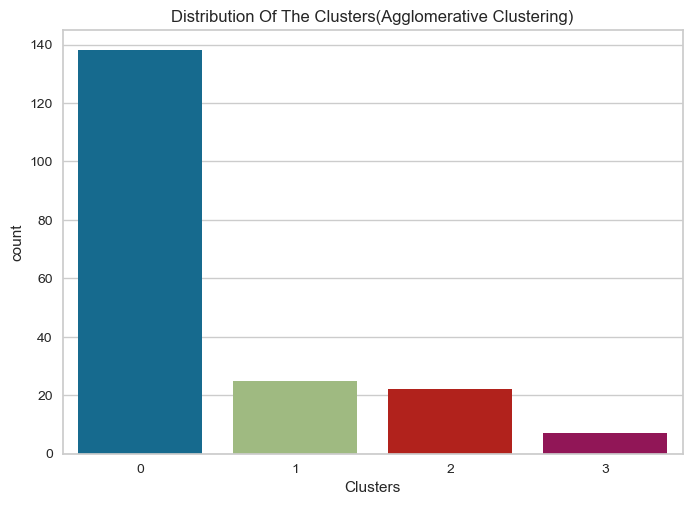

In [49]:
agg = sns.countplot(x=df["Clusters"])
agg.set_title("Distribution Of The Clusters(Agglomerative Clustering)")
plt.show()

As we can see, the distribution of Agglomerative clustering are not fairly distributed. The group 0 is highly larger than other groups. 

In [50]:
sns.scatterplot(x=df['followers(m)'], y=df["posts(k)"], hue=df['Clusters'])

<AxesSubplot:xlabel='followers(m)', ylabel='posts(k)'>

In the plot, we can divide the clustering into three groups:

group0: Low followers & Low number of posts

group1:  Average followers & Low number of posts

group2:  High followers & Low number of posts

group3: Low followers & High number of posts

As we can see in this dataset, the three models cannot evaluate well because through this dataset, the points are highly similar with each other with few outliers. So clustering may be difficult to clearly seperate one group to another group. From my hypothesis, since the dataset of the instagram influencers are already popular enough, so they have similar followers and number of posts. It is hard for different methods to be implemented in this dataset. 
But the K-mean and Agglomerative Clustering can also be generated to evaluate other factors to gather some results. 

### Conclusions

Clustering is a very useful tool for data analytics. For our project, it can seperate unsupervied dataset into different groups in order to help us know the relationship between each group and difference results generated in different groups. In the real life, this typ of clustering implement is called customer segmentation. For example, we can generate customers' different behaviors and divide them into different groups in order to match the targeted marketing compaigns. For out project topic, product sellers can first generate customer behaviors and then target suitable internet influencers to help them to do the advertisments promotion in order to earn more benefits. 

More than this, From this analysis, we can clearly see that the development of social media platforms and wemedia influencers cannot live alone without data analytics and machine learnings. Clustering and Classification are all very useful tool for them to locate the target audiences and help them to earn more benefits. 

### References

Girgin, S. (2021, December 10). K-Means Clustering Model in 6 Steps with Python - PursuitData. Medium. https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad

GeeksforGeeks. (2022, August 23). Clustering in Machine Learning. https://www.geeksforgeeks.org/clustering-in-machine-learning/

Subramanian, N. B. (2021, June 27). Hierarchical Clustering. AI ASPIRANT. https://aiaspirant.com/hierarchical-clustering/